## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

## Importing the dataset

In [4]:
data = pd.read_csv("ann_arbor_temp_data.csv")
data.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


## Formatting the dataset

In [7]:
# dropping the leap 29th feb(leap year day) data for more uniformity in the visualisation

data = data[data['Date'] != '2008-02-29']
data = data[data['Date'] != '2012-02-29']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165002 entries, 0 to 165084
Data columns (total 4 columns):
ID            165002 non-null object
Date          165002 non-null object
Element       165002 non-null object
Data_Value    165002 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.3+ MB


In [8]:
# droppinng the id column
data = data.iloc[:, 1:]
data.head()

,Date,Element,Data_Value
0,2014-11-12,TMAX,22
1,2009-04-29,TMIN,56
2,2008-05-26,TMAX,278
3,2005-11-11,TMAX,139
4,2014-02-27,TMAX,-106


In [9]:
# seggregating the max and min temp data into diffrent dataframes
max_temp_data = data[data['Element'] == 'TMAX']
min_temp_data = data[data['Element'] == 'TMIN']

In [11]:
max_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83020 entries, 0 to 165082
Data columns (total 3 columns):
Date          83020 non-null object
Element       83020 non-null object
Data_Value    83020 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [12]:
min_temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81982 entries, 1 to 165084
Data columns (total 3 columns):
Date          81982 non-null object
Element       81982 non-null object
Data_Value    81982 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [14]:
# sorting the minimum and maximum temperature dataframes by date 
max_temp_data.sort_values(by = ['Date'], inplace = True)
min_temp_data.sort_values(by = ['Date'], inplace = True)

C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
max_temp_data.head()

,Date,Element,Data_Value
3058,2005-01-01,TMAX,128
19772,2005-01-01,TMAX,128
18261,2005-01-01,TMAX,56
1860,2005-01-01,TMAX,150
60994,2005-01-01,TMAX,133


In [17]:
min_temp_data.head()

,Date,Element,Data_Value
18232,2005-01-01,TMIN,-17
55067,2005-01-01,TMIN,-28
18066,2005-01-01,TMIN,-39
32274,2005-01-01,TMIN,-50
2812,2005-01-01,TMIN,-50


In [18]:
# since data contains multiple records for all dates we collect all unique dates seprately
dates = max_temp_data['Date'].unique()

In [20]:
# creating a datset max_min_record to store maximum and minumum temprature for all dates beteween jan 1 2005 to dec 31 2015
# initally keeping maximum and minimum temperature records to 0
max_min_temp_record = pd.DataFrame({'Date': dates, 'MaxTemp': 0, 'MinTemp': 0})
max_min_temp_record.set_index(['Date'], inplace = True)
max_min_temp_record.head()

,MaxTemp,MinTemp
Date,,
2005-01-01,0,0
2005-01-02,0,0
2005-01-03,0,0
2005-01-04,0,0
2005-01-05,0,0


In [21]:
# Filling out the MaxTemp and MinTemp columsn of the max_min_temp_record dataframe using max_temp_data and min_temp_data
# This is a slow function and might take couple of minutes
for date in dates:
    temp = max_temp_data[max_temp_data['Date'] == date]['Data_Value']
    max_min_temp_record['MaxTemp'][date] = max(max_temp_data[max_temp_data['Date'] == date]['Data_Value'])
    max_min_temp_record['MinTemp'][date] = min(min_temp_data[min_temp_data['Date'] == date]['Data_Value'])

In [22]:
temp = copy.copy(max_min_temp_record)
temp.reset_index(inplace = True)
temp.head()


,Date,MaxTemp,MinTemp
0,2005-01-01,156,-56
1,2005-01-02,139,-56
2,2005-01-03,133,0
3,2005-01-04,39,-39
4,2005-01-05,33,-94


In [23]:
# this index will be used as index for year day from day1 to day365
index = np.array(range(1, 366))

## creating seprate records of maximum and minimum temperature data for 11 years 2005 to 2015

In [24]:
max_min_temp_record = temp.iloc[:, 1:]
max_min_temp_record.head()

,MaxTemp,MinTemp
0,156,-56
1,139,-56
2,133,0
3,39,-39
4,33,-94


In [26]:
max_min_temp_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 2 columns):
MaxTemp    4015 non-null int64
MinTemp    4015 non-null int64
dtypes: int64(2)
memory usage: 62.8 KB


### creating max and min temperatue data for 2005

In [27]:
temp_record_2005 = max_min_temp_record.iloc[:365, :]
temp_record_2005.rename(columns = {'MaxTemp': '2005Max', 'MinTemp': '2005Min'}, inplace = True)
temp_record_2005['Day'] = index
temp_record_2005.set_index(['Day'], inplace = True)
temp_record_2005.head()

C:\Users\veerendra\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,2005Max,2005Min
Day,,
1,156,-56
2,139,-56
3,133,0
4,39,-39
5,33,-94


### creating max and min temperatue data for 2006

In [28]:
temp_record_2006 = max_min_temp_record.iloc[365:365*2, :]
temp_record_2006.rename(columns = {'MaxTemp': '2006Max', 'MinTemp': '2006Min'}, inplace = True)
temp_record_2006['Day'] = index
temp_record_2006.set_index(['Day'], inplace = True)
temp_record_2006.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2006Max    365 non-null int64
2006Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2007

In [29]:
temp_record_2007 = max_min_temp_record.iloc[365*2:365*3, :]
temp_record_2007.rename(columns = {'MaxTemp': '2007Max', 'MinTemp': '2007Min'}, inplace = True)
temp_record_2007['Day'] = index
temp_record_2007.set_index(['Day'], inplace = True)
temp_record_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2007Max    365 non-null int64
2007Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2008

In [30]:
temp_record_2008 = max_min_temp_record.iloc[365*3:365*4, :]
temp_record_2008.rename(columns = {'MaxTemp': '2008Max', 'MinTemp': '2008Min'}, inplace = True)
temp_record_2008['Day'] = index
temp_record_2008.set_index(['Day'], inplace = True)
temp_record_2008.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2008Max    365 non-null int64
2008Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2009

In [32]:
temp_record_2009 = max_min_temp_record.iloc[365*4:365*5, :]
temp_record_2009.rename(columns = {'MaxTemp': '2009Max', 'MinTemp': '2009Min'}, inplace = True)
temp_record_2009['Day'] = index
temp_record_2009.set_index(['Day'], inplace = True)
temp_record_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2009Max    365 non-null int64
2009Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2010

In [33]:
temp_record_2010 = max_min_temp_record.iloc[365*5:365*6, :]
temp_record_2010.rename(columns = {'MaxTemp': '2010Max', 'MinTemp': '2010Min'}, inplace = True)
temp_record_2010['Day'] = index
temp_record_2010.set_index(['Day'], inplace = True)
temp_record_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2010Max    365 non-null int64
2010Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2011

In [34]:
temp_record_2011 = max_min_temp_record.iloc[365*6:365*7, :]
temp_record_2011.rename(columns = {'MaxTemp': '2011Max', 'MinTemp': '2011Min'}, inplace = True)
temp_record_2011['Day'] = index
temp_record_2011.set_index(['Day'], inplace = True)
temp_record_2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2011Max    365 non-null int64
2011Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2012

In [35]:
temp_record_2012 = max_min_temp_record.iloc[365*7:365*8, :]
temp_record_2012.rename(columns = {'MaxTemp': '2012Max', 'MinTemp': '2012Min'}, inplace = True)
temp_record_2012['Day'] = index
temp_record_2012.set_index(['Day'], inplace = True)
temp_record_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2012Max    365 non-null int64
2012Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2013

In [36]:
temp_record_2013 = max_min_temp_record.iloc[365*8:365*9, :]
temp_record_2013.rename(columns = {'MaxTemp': '2013Max', 'MinTemp': '2013Min'}, inplace = True)
temp_record_2013['Day'] = index
temp_record_2013.set_index(['Day'], inplace = True)
temp_record_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2013Max    365 non-null int64
2013Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2014

In [37]:
temp_record_2014 = max_min_temp_record.iloc[365*9:365*10, :]
temp_record_2014.rename(columns = {'MaxTemp': '2014Max', 'MinTemp': '2014Min'}, inplace = True)
temp_record_2014['Day'] = index
temp_record_2014.set_index(['Day'], inplace = True)
temp_record_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2014Max    365 non-null int64
2014Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### creating max and min temperatue data for 2015

In [38]:
temp_record_2015 = max_min_temp_record.iloc[365*10:, :]
temp_record_2015.rename(columns = {'MaxTemp': '2015Max', 'MinTemp': '2015Min'}, inplace = True)
temp_record_2015['Day'] = index
temp_record_2015.set_index(['Day'], inplace = True)
temp_record_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 2 columns):
2015Max    365 non-null int64
2015Min    365 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


C:\Users\veerendra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Concating the 11 years record into single dataframe

In [39]:
day_wise_temp_record = pd.concat([temp_record_2005, temp_record_2006, temp_record_2007, temp_record_2008, temp_record_2009, temp_record_2010, temp_record_2011, temp_record_2012, temp_record_2013, temp_record_2014, temp_record_2015], axis=1)

In [40]:
day_wise_temp_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 22 columns):
2005Max    365 non-null int64
2005Min    365 non-null int64
2006Max    365 non-null int64
2006Min    365 non-null int64
2007Max    365 non-null int64
2007Min    365 non-null int64
2008Max    365 non-null int64
2008Min    365 non-null int64
2009Max    365 non-null int64
2009Min    365 non-null int64
2010Max    365 non-null int64
2010Min    365 non-null int64
2011Max    365 non-null int64
2011Min    365 non-null int64
2012Max    365 non-null int64
2012Min    365 non-null int64
2013Max    365 non-null int64
2013Min    365 non-null int64
2014Max    365 non-null int64
2014Min    365 non-null int64
2015Max    365 non-null int64
2015Min    365 non-null int64
dtypes: int64(22)
memory usage: 65.6 KB


In [41]:
day_wise_temp_record.head()

,2005Max,2005Min,2006Max,2006Min,2007Max,2007Min,2008Max,2008Min,2009Max,2009Min,...,2011Max,2011Min,2012Max,2012Min,2013Max,2013Min,2014Max,2014Min,2015Max,2015Min
Day,,,,,,,,,,,,,,,,,,,,,
1,156,-56,39,-39,128,-44,39,-50,-5,-156,...,144,-94,100,-22,28,-160,-56,-128,11,-133
2,139,-56,44,-11,111,-61,17,-210,22,-156,...,139,-111,89,-83,-6,-199,-66,-267,39,-122
3,133,0,61,0,100,-39,-22,-249,17,-122,...,28,-122,83,-128,0,-172,-67,-267,39,-67
4,39,-39,72,17,106,-17,17,-200,28,-83,...,39,-150,28,-128,-5,-133,0,-261,44,-88
5,33,-94,72,-67,128,17,83,-89,28,-138,...,33,-133,67,-100,17,-150,28,-139,28,-155


In [42]:
# creating 2 new columsn for holding maximum and minimum temperatue of all 365 days for 10 year period(2005, 2014)
day_wise_temp_record['10YearMax'] = 0
day_wise_temp_record['10YearMin'] = 0
day_wise_temp_record.head()

,2005Max,2005Min,2006Max,2006Min,2007Max,2007Min,2008Max,2008Min,2009Max,2009Min,...,2012Max,2012Min,2013Max,2013Min,2014Max,2014Min,2015Max,2015Min,10YearMax,10YearMin
Day,,,,,,,,,,,,,,,,,,,,,
1,156,-56,39,-39,128,-44,39,-50,-5,-156,...,100,-22,28,-160,-56,-128,11,-133,0,0
2,139,-56,44,-11,111,-61,17,-210,22,-156,...,89,-83,-6,-199,-66,-267,39,-122,0,0
3,133,0,61,0,100,-39,-22,-249,17,-122,...,83,-128,0,-172,-67,-267,39,-67,0,0
4,39,-39,72,17,106,-17,17,-200,28,-83,...,28,-128,-5,-133,0,-261,44,-88,0,0
5,33,-94,72,-67,128,17,83,-89,28,-138,...,67,-100,17,-150,28,-139,28,-155,0,0


In [43]:
temp2 = day_wise_temp_record.iloc[:, :20]
for ind in index:
    day_wise_temp_record['10YearMax'][ind] = max(temp2.iloc[ind-1].values)
    day_wise_temp_record['10YearMin'][ind] = min(temp2.iloc[ind-1].values)
day_wise_temp_record

,2005Max,2005Min,2006Max,2006Min,2007Max,2007Min,2008Max,2008Min,2009Max,2009Min,...,2012Max,2012Min,2013Max,2013Min,2014Max,2014Min,2015Max,2015Min,10YearMax,10YearMin
Day,,,,,,,,,,,,,,,,,,,,,
1,156,-56,39,-39,128,-44,39,-50,-5,-156,...,100,-22,28,-160,-56,-128,11,-133,156,-160
2,139,-56,44,-11,111,-61,17,-210,22,-156,...,89,-83,-6,-199,-66,-267,39,-122,139,-267
3,133,0,61,0,100,-39,-22,-249,17,-122,...,83,-128,0,-172,-67,-267,39,-67,133,-267
4,39,-39,72,17,106,-17,17,-200,28,-83,...,28,-128,-5,-133,0,-261,44,-88,106,-261
5,33,-94,72,-67,128,17,83,-89,28,-138,...,67,-100,17,-150,28,-139,28,-155,128,-150
6,0,-106,33,-78,133,-44,189,-17,6,-189,...,128,-56,44,-122,22,-266,33,-182,189,-266
7,6,-111,17,-78,94,-67,217,28,0,-133,...,128,-22,28,-61,-94,-306,-67,-182,217,-306
8,17,-100,56,-44,72,-50,194,28,0,-106,...,83,-67,33,-99,-72,-294,-82,-211,194,-294
9,28,-67,67,-50,44,-72,178,-17,6,-117,...,72,-78,89,-117,-27,-278,-66,-206,178,-278


## Plotting the line graph of maximum and minimum temprature for all 365 days during the 10 year period 2005 to 2014

In [44]:
# setting the figure size for our plot
plt.rcParams["figure.figsize"] = [16, 8]


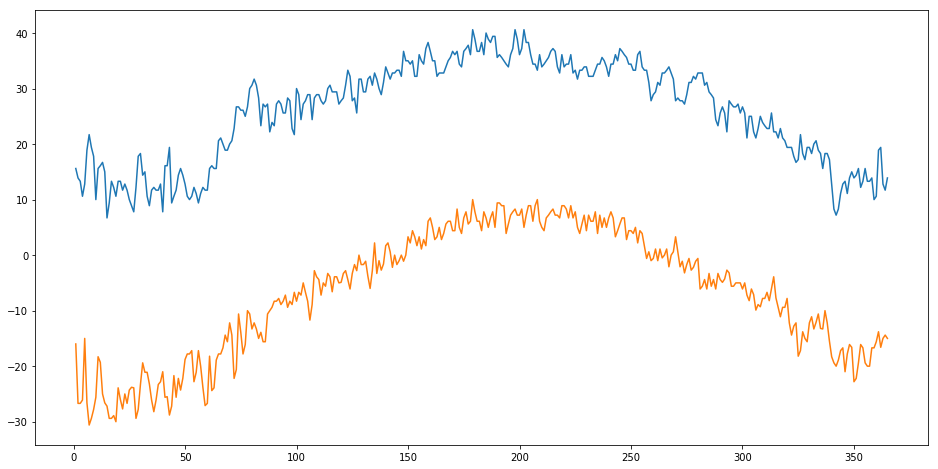

In [46]:
plt.figure()
plt.plot(index, day_wise_temp_record['10YearMax'].values/10, label = 'MaxTemp')
plt.plot(index, day_wise_temp_record['10YearMin'].values/10, label = 'MinTemp')
plt.show()

### preparing the record of 2015 data to compare with last 10 year data

In [47]:
max_record_of_2015 = day_wise_temp_record[day_wise_temp_record['10YearMax'] < day_wise_temp_record['2015Max']]['2015Max']

In [48]:
min_record_of_2015 = day_wise_temp_record[day_wise_temp_record['10YearMin'] > day_wise_temp_record['2015Min']]['2015Min']

In [49]:
min_record_of_2015

Day
5     -155
11    -200
34    -238
45    -239
46    -260
47    -294
48    -272
50    -260
51    -343
52    -322
54    -267
55    -272
56    -217
57    -216
58    -288
59    -272
64    -221
65    -255
66    -222
87    -122
88    -111
89    -122
114    -71
115    -50
140      0
184     72
240     56
290    -55
291    -55
292    -61
293    -39
314    -44
Name: 2015Min, dtype: int64

In [50]:
type(max_record_of_2015.values)

numpy.ndarray

In [52]:
type(max_record_of_2015.index)

pandas.core.indexes.numeric.Int64Index

### Overlaying the line graph with scatter of all days in 2015 when temperature record was broken for either maximum or minimum temperature of last 10 year

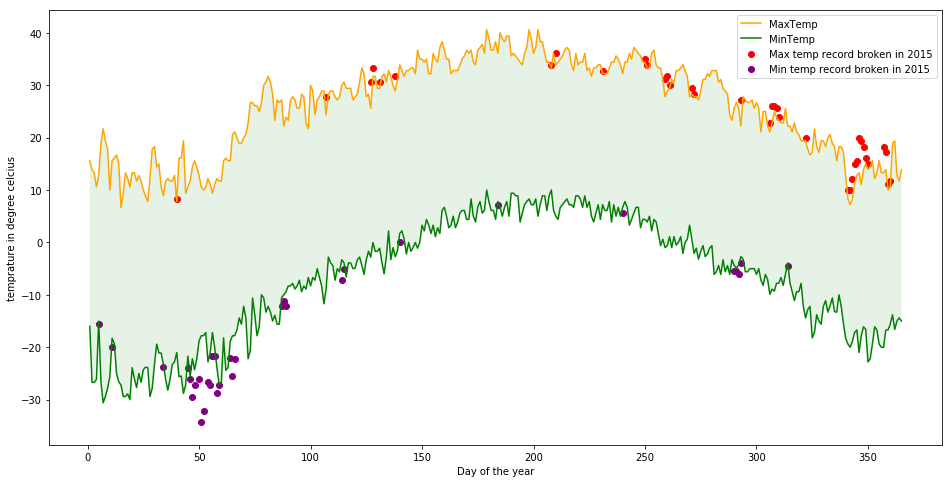

In [53]:
y1 = day_wise_temp_record['10YearMax'].values/10
y2 = day_wise_temp_record['10YearMin'].values/10
plt.figure()
plt.plot(index, y1, label = 'MaxTemp', color = 'orange')
plt.plot(index, y2, label = 'MinTemp', color = 'green')
plt.scatter(np.array(max_record_of_2015.index), max_record_of_2015.values/10, color = 'red', label = 'Max temp record broken in 2015')
plt.scatter(np.array(min_record_of_2015.index), min_record_of_2015.values/10, color = 'purple', label = 'Min temp record broken in 2015')
plt.gca().fill_between(range(1, len(index)+1), y2, y1, facecolor='green', alpha=0.10)
plt.xlabel("Day of the year")
plt.ylabel("temprature in degree celcius")
plt.legend()
plt.show() 

## Information gained from the visual

###### 2015 broke the record for lowest temperature attained in last 10 years a number of times indicating the major climate change
###### 2015 also broke the record for highest temperature achived on a particular day a quite a few times 